# Campus Recruitment

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Logistic_Regression.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Missing Values

In [4]:
df.isnull().sum()*100/df.shape[0]

sl_no              0.000000
gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

In [5]:
df['salary'].fillna(df['salary'].mean(),inplace =True)

In [6]:
df.isnull().sum()*100/df.shape[0]

sl_no             0.0
gender            0.0
ssc_p             0.0
ssc_b             0.0
hsc_p             0.0
hsc_b             0.0
hsc_s             0.0
degree_p          0.0
degree_t          0.0
workex            0.0
etest_p           0.0
specialisation    0.0
mba_p             0.0
status            0.0
salary            0.0
dtype: float64

In [7]:
listem= ['ssc_b',"hsc_b","hsc_s","degree_t","workex","specialisation","status"]
for i in listem:
    print(i+ '\n',df[i].unique())

ssc_b
 ['Others' 'Central']
hsc_b
 ['Others' 'Central']
hsc_s
 ['Commerce' 'Science' 'Arts']
degree_t
 ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex
 ['No' 'Yes']
specialisation
 ['Mkt&HR' 'Mkt&Fin']
status
 ['Placed' 'Not Placed']


In [8]:
df['status'].replace({'Placed':1,'Not Placed':0},inplace=True)

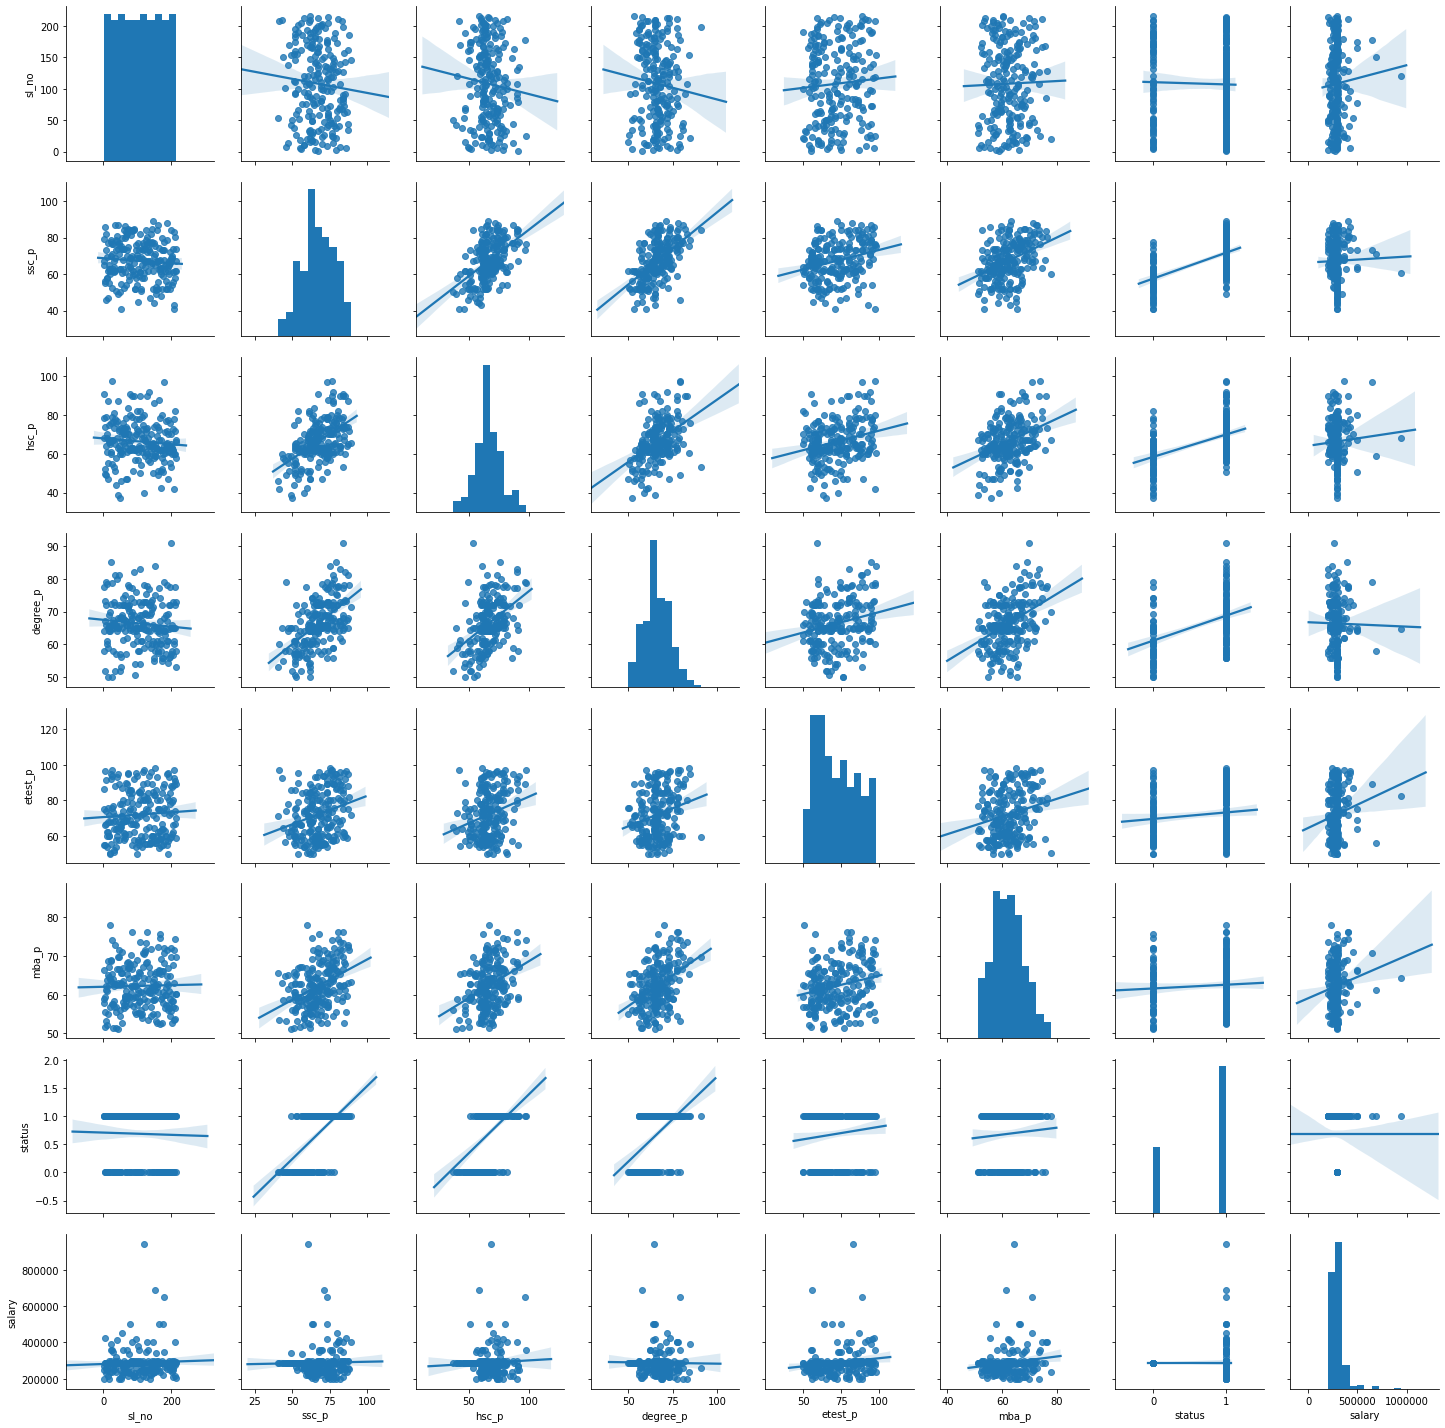

In [9]:
import seaborn as sns
sns.pairplot(df,kind="reg")

In [10]:
df_corr= df.corr()
df_corr

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,-2.685942e-02,5.155040e-02
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,6.078887e-01,2.357072e-02
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,4.912279e-01,5.450558e-02
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,4.798610e-01,-1.414817e-02
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,1.276394e-01,1.528286e-01
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,7.692165e-02,1.463245e-01
status,-0.026859,0.607889,0.491228,0.479861,0.127639,0.076922,1.000000e+00,9.450535e-17
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,9.450535e-17,1.000000e+00


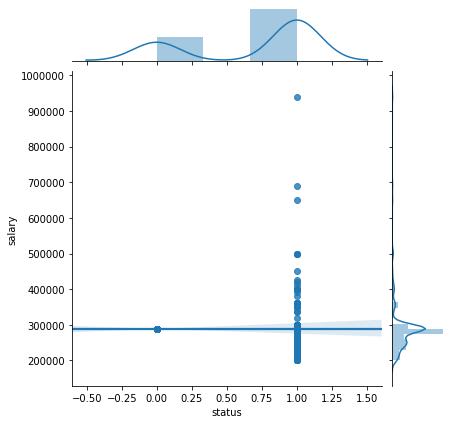

In [11]:
sns.jointplot(x='status', y='salary', data= df , kind="reg")

In [12]:
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [13]:
df["ssc_b"]= pd.get_dummies(df.ssc_b)
df["hsc_b"]= pd.get_dummies(df.hsc_b)
df["workex"]= df.workex.replace({'No':0,'Yes':1})
df["specialisation"]= pd.get_dummies(df.specialisation)
df["gender"]= pd.get_dummies(df.gender)
df["hsc_s"]= pd.get_dummies(df.hsc_s)
df["degree_t"]= pd.get_dummies(df.degree_t)

# Model 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [15]:
y = df['status']
X = df.drop('status', axis=1)

# Normalization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

# HyperParametrs 

In [17]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

In [18]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X, y)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
The best score         :  0.8699134199134197


In [19]:
def create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logistic = LogisticRegression(solver='liblinear',penalty='l1',C=10000)
    logistic.fit(X_train, y_train)
    
    prediction_train=logistic.predict(X_train)
    prediction_test=logistic.predict(X_test)
    
    prediction_test_prob = logistic.predict_proba(X_test)[:,1]
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob)},name=tip)
    return d

In [20]:
metrics=pd.DataFrame()
metrics=metrics.append(create_model(X_scl,y,tip='Logistic_Regr.'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729


# Cross Validation

In [21]:
from sklearn.model_selection import cross_validate, cross_val_score

lrm = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
cv = cross_validate(estimator=lrm,
                     X=X_scl,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores          : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.81818182 0.81818182 0.81818182 0.77272727 0.86363636 0.9047619
 0.9047619  0.80952381 0.80952381 0.76190476]
--------------------------------------------------
Train Scores          : 
[0.84974093 0.87046632 0.85492228 0.85492228 0.85492228 0.86082474
 0.84536082 0.8556701  0.8556701  0.86597938]


In [22]:
print('Mean of Test Sets : ', cv['test_score'].mean())
print('Mean of Train Sets : ', cv['train_score'].mean())

Mean of Test Sets :  0.8281385281385282
Mean of Train Sets :  0.8568479247903424


# K-Nearest Neighbour Algorithm

In [23]:
y = df['status']
X = df.drop('status', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
test_preds=Knn.predict(X_test)
y_probs=Knn.predict_proba(X_test)[:,1]

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
def metric(x,y):
    print("Precision Score: {}".format(precision_score(x,y)))
    print('Recall Score   : {}'.format(recall_score(x,y)))
    print("Accuracy Score : {}".format(accuracy_score(x,y)))
    print("F1 Score       : {}".format(f1_score(x,y)))
metric(y_test,test_preds)
print("AUC Score      : {}".format(roc_auc_score(y_test,y_probs)))

Precision Score: 0.8181818181818182
Recall Score   : 0.9
Accuracy Score : 0.7906976744186046
F1 Score       : 0.8571428571428572
AUC Score      : 0.8423076923076923


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
Knn=KNeighborsClassifier()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='roc_auc')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsClassifier(n_neighbors=1)
The best score: 0.993095238095238


# Cross Validation

In [29]:
from sklearn.model_selection import cross_validate, cross_val_score

Knn = KNeighborsClassifier(n_neighbors=1)
cv = cross_validate(estimator=Knn,
                     X=X_scl,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores          : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.63636364 0.81818182 0.72727273 0.86363636 0.81818182 0.80952381
 0.9047619  0.71428571 0.71428571 0.61904762]
--------------------------------------------------
Train Scores          : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
print('Mean of Test Sets : ', cv['test_score'].mean())
print('Mean of Train Sets : ', cv['train_score'].mean())

Mean of Test Sets :  0.7625541125541127
Mean of Train Sets :  1.0


In [31]:
def Knn_create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    Knn = KNeighborsClassifier(n_neighbors=1)
    Knn.fit(X_train, y_train)
    
    prediction_train=Knn.predict(X_train)
    prediction_test=Knn.predict(X_test)
    
    prediction_test_prob = Knn.predict_proba(X_test)[:,1]
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob)},name=tip)
    return d

In [32]:
metrics=metrics.append(Knn_create_model(X_scl,y,tip='Knn_Model.'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_Model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000


# CART Algoritm

In [33]:
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier(criterion='entropy', random_state=1337)

y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

cart_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1337)

In [34]:
test_preds=cart_model.predict(X_test)
y_probs=cart_model.predict_proba(X_test)[:,1]

In [35]:
def metric(x,y):
    print("Precision Score: {}".format(precision_score(x,y)))
    print('Recall Score   : {}'.format(recall_score(x,y)))
    print("Accuracy Score : {}".format(accuracy_score(x,y)))
    print("F1 Score       : {}".format(f1_score(x,y)))
    print("AUC Score      : {}".format(roc_auc_score(y_test,y_probs)))
metric(y_test,test_preds)

Precision Score: 1.0
Recall Score   : 0.9666666666666667
Accuracy Score : 0.9767441860465116
F1 Score       : 0.983050847457627
AUC Score      : 0.9833333333333334


# GridSearch Optimize 

In [36]:
cart_params= {'min_samples_split':range(2,20), 
             "max_leaf_nodes":range(2,10),
             "max_features":range(0,5)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1337),
             param_grid={'max_features': range(0, 5),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 20)})

In [37]:
cart_cv_model.best_params_

{'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}

In [38]:
cart_model = DecisionTreeClassifier(criterion='entropy', random_state=1337,max_features= 4,max_leaf_nodes=7, min_samples_split=2 )

y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

cart_model.fit(X_train,y_train)

test_preds=cart_model.predict(X_test)
y_probs=cart_model.predict_proba(X_test)[:,1]

train_preds=cart_model.predict(X_train)


# Test Metrics Results

In [39]:
metric(y_test,test_preds)

Precision Score: 1.0
Recall Score   : 0.9333333333333333
Accuracy Score : 0.9534883720930233
F1 Score       : 0.9655172413793104
AUC Score      : 0.9615384615384616


# Train Metrics Results

In [40]:
metric(y_train,train_preds)

Precision Score: 0.9831932773109243
Recall Score   : 0.9915254237288136
Accuracy Score : 0.9825581395348837
F1 Score       : 0.9873417721518987
AUC Score      : 0.9615384615384616


In [41]:
def cart_create_model(X,y,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    cart_model = DecisionTreeClassifier(criterion='entropy', random_state=1337,max_features= 4,max_leaf_nodes=7, min_samples_split=2 )
    cart_model.fit(X_train, y_train)
    
    prediction_train=cart_model.predict(X_train)
    prediction_test=cart_model.predict(X_test)
    
    prediction_test_prob = cart_model.predict_proba(X_test)[:,1]
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob)},name=tip)
    return d

In [42]:
metrics=metrics.append(cart_create_model(X_scl,y,tip='CART_Model'))

In [43]:
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_Model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
CART_Model,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000
